In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction


In this analysis, we will discuss how you can use NLP to determine whether the news is real or fake. Nowadays, fake news has become a common problem. Even respected media organizations are known to propagate fake news and are losing credibility. It can be difficult to trust news, because it can be difficult to know whether a news story is real or fake.

# Dataset
1.train.csv: A full training dataset with the following attributes                                         
2.id: unique id for a news article                                                                         
3.title: the title of a news article                                                                       
4.author: author of the news article                                                                       
5.text: the text of the article; could be incomplete                                                       
6.label: a label that marks the article as potentially unreliable. Where 0: reliable and 1: unreliable.

# Importing important libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
# here we are importing nltk,stopwords and porterstemmer we are using stemming on the text
# we have and stopwords will help in removing the stopwords in the text

#re is regular expressions used for identifying only words in the text and ignoring anything else
import nltk
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps=PorterStemmer()

# Reading dataset

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/research/aireserchnlp/fakenews/try2/fakdata/train.csv')
test_df=pd.read_csv('/content/drive/MyDrive/research/aireserchnlp/fakenews/try2/fakdata/test.csv')

In [ ]:
# here we are printing first five lines of our train dataset
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Data Pre-Processing

#preprocessing

In [ ]:
#filling nan values with space(' ')
train_df.fillna(' ',inplace=True)

In [ ]:
#combining title and author,title and summary is formed
train_df['summary']=train_df['title']+' '+train_df['author']+' '+train_df['text']
train_df.head()

,id,title,author,text,label,summary
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [ ]:
train_df['summary'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart Daniel J. Flynn Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates

In [ ]:
train_df.isnull().sum()

id         0
title      0
author     0
text       0
label      0
summary    0
dtype: int64

In [ ]:
train_df['summary']==' '

0        False
1        False
2        False
3        False
4        False
         ...  
20795    False
20796    False
20797    False
20798    False
20799    False
Name: summary, Length: 20800, dtype: bool

**Removel of stop words and Stemming the words**

In [ ]:
x=train_df['summary']
y=train_df['label']

In [ ]:
x.head()

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2    Why the Truth Might Get You Fired Consortiumne...
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
Name: summary, dtype: object

In [ ]:
x[1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart Daniel J. Flynn Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# here we are creating corpus for the test dataset exactly the same as we created for the
# training dataset
corpus=[]
for i in range(0,len(train_df)):
    review=re.sub('[^a-zA-Z]',' ',x[i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [ ]:
corpus[1]

'flynn hillari clinton big woman campu breitbart daniel j flynn ever get feel life circl roundabout rather head straight line toward intend destin hillari clinton remain big woman campu leafi liber wellesley massachusett everywher els vote like inaugur dress remaind day way miss havisham forev wore wed dress speak great expect hillari rodham overflow year ago first address wellesley graduat class presid colleg inform gather student need debat far could ascertain spokesman kind like democrat primari minu term unknown even seven sister school glad miss adam made clear speak today us us miss rodham told classmat appoint edger bergen charli mccarthi mortim snerd attend bespectacl granni glass award matronli wisdom least john lennon wisdom took issu previou speaker despit becom first win elect seat u senat sinc reconstruct edward brook came critic call empathi goal protestor critic tactic though clinton senior thesi saul alinski lament black power demagogu elitist arrog repress intoler with

**Word Embedding — One hot encoding**

The machine cannot understand words and therefore it needs numerical values so as to make it easier for the machine to process the data. To apply any type of algorithm to the data, we need to convert the categorical data to numbers. To achieve this, one hot ending is one way as it converts categorical variables to binary vectors.

In [ ]:
#vocabulary size
voc_size=10000

In [ ]:
# TensorFlow has an operation for one-hot encoding
one_hot_reps1=[one_hot(word,voc_size) for word in corpus]
one_hot_reps1[1]

[5424,
 7086,
 7619,
 7998,
 510,
 92,
 7674,
 3856,
 7965,
 5424,
 925,
 3294,
 6413,
 7877,
 2929,
 4830,
 6963,
 7886,
 5338,
 1110,
 6139,
 4592,
 7808,
 7086,
 7619,
 2971,
 7998,
 510,
 92,
 8049,
 3582,
 7849,
 7906,
 8213,
 8050,
 130,
 6618,
 2037,
 8637,
 7759,
 5701,
 3599,
 8607,
 5043,
 617,
 9242,
 341,
 8637,
 9601,
 2836,
 9506,
 7086,
 3937,
 2482,
 9280,
 631,
 4194,
 8764,
 7849,
 4411,
 5267,
 2985,
 8092,
 2175,
 1706,
 9095,
 5184,
 2929,
 7254,
 980,
 7976,
 2838,
 4564,
 6618,
 6290,
 8630,
 3281,
 5402,
 8423,
 4248,
 7902,
 9015,
 7686,
 2164,
 8607,
 9726,
 9200,
 6447,
 9601,
 8311,
 5794,
 5794,
 8607,
 3937,
 317,
 3005,
 7475,
 4421,
 7514,
 8345,
 8702,
 1093,
 4442,
 2427,
 4677,
 2125,
 5778,
 5832,
 1251,
 4179,
 572,
 8892,
 8670,
 4179,
 3173,
 6686,
 2449,
 8394,
 6253,
 9847,
 4194,
 4514,
 5644,
 2248,
 8865,
 3610,
 2531,
 7710,
 6651,
 678,
 3981,
 9679,
 9260,
 1014,
 1119,
 3844,
 9679,
 4393,
 1010,
 7619,
 4768,
 7014,
 1204,
 5136,
 6819,


**Word Embedding**

In [ ]:
# here we are specifying a sentence length so that every sentence in the corpus will be of same length
sent_length=500
#making all the sentence as equall size vector
#two types of padding pre and post
embedded_docs1=pad_sequences(one_hot_reps1,padding='pre',maxlen=sent_length)
embedded_docs1

array([[   0,    0,    0, ..., 1938, 5406, 3268],
       [   0,    0,    0, ..., 8184, 9479, 7101],
       [ 393, 3647, 6194, ..., 2687, 7126, 3784],
       ...,
       [   0,    0,    0, ...,  851, 1154, 8995],
       [   0,    0,    0, ..., 2633, 7051,  167],
       [9280, 8727, 9330, ..., 7913, 6339, 2109]], dtype=int32)

In [ ]:
x=np.array(embedded_docs1)
y=np.array(y)

In [ ]:
x

array([[   0,    0,    0, ..., 1938, 5406, 3268],
       [   0,    0,    0, ..., 8184, 9479, 7101],
       [ 393, 3647, 6194, ..., 2687, 7126, 3784],
       ...,
       [   0,    0,    0, ...,  851, 1154, 8995],
       [   0,    0,    0, ..., 2633, 7051,  167],
       [9280, 8727, 9330, ..., 7913, 6339, 2109]], dtype=int32)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

# Data Pre-Processing for testing data

In [ ]:
test_df.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
test_df.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [ ]:
#filling nan values with space(' ')
test_df=test_df.fillna(' ')
test_df.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [ ]:
#combining title and author,title and summary is formed
test_df['summary']=test_df['title']+' '+test_df['author']+' '+test_df['title']
test_df.head()

,id,title,author,text,summary
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) Truth Broadcas...


In [ ]:
test_df['summary'][0]

'Specter of Trump Loosens Tongues, if Not Purse Strings, in Silicon Valley - The New York Times David Streitfeld Specter of Trump Loosens Tongues, if Not Purse Strings, in Silicon Valley - The New York Times'

**Removel of stop words and Stemming the words**

In [ ]:
# here we are creating corpus for the test dataset exactly the same as we created for the
# testinging dataset
corpus_test=[]

for i in range(0,len(test_df)):
    review=re.sub('[^a-zA-Z]',' ',test_df['summary'][i])
    review=review.lower()
    review=review.split()

    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus_test.append(review)


In [ ]:
corpus_test[1]

'russian warship readi strike terrorist near aleppo russian warship readi strike terrorist near aleppo'

In [ ]:
# TensorFlow has an operation for one-hot encoding
one_hot_reps2=[one_hot(word,voc_size) for word in corpus_test]
one_hot_reps2[1]

[6687,
 2112,
 9852,
 3363,
 8558,
 7112,
 7194,
 6687,
 2112,
 9852,
 3363,
 8558,
 7112,
 7194]

In [ ]:
# here we are specifying a sentence length so that every sentence in the corpus will be of same length
sent_length=500
# here we are using padding for creating equal length sentences
embedded_docs2=pad_sequences(one_hot_reps2,padding='pre',maxlen=sent_length)
embedded_docs2

array([[   0,    0,    0, ..., 7631, 4123, 6157],
       [   0,    0,    0, ..., 8558, 7112, 7194],
       [   0,    0,    0, ...,  462, 3585, 5666],
       ...,
       [   0,    0,    0, ..., 7631, 4123, 6157],
       [   0,    0,    0, ..., 6687, 3883, 9688],
       [   0,    0,    0, ..., 7631, 4123, 6157]], dtype=int32)

In [ ]:
embedded_docs2.shape

(5200, 500)

In [ ]:
test_df=np.array(embedded_docs2)
test_df

array([[   0,    0,    0, ..., 7631, 4123, 6157],
       [   0,    0,    0, ..., 8558, 7112, 7194],
       [   0,    0,    0, ...,  462, 3585, 5666],
       ...,
       [   0,    0,    0, ..., 7631, 4123, 6157],
       [   0,    0,    0, ..., 6687, 3883, 9688],
       [   0,    0,    0, ..., 7631, 4123, 6157]], dtype=int32)

# LSTM

# Building Models

In [ ]:
#Creating model
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')
embedded_feature_vector=300
nn=Sequential([

    Embedding(voc_size,embedded_feature_vector,input_length=sent_length),
    Dropout(0.5),
    LSTM(199),
    Dropout(0.4),
    Dense(399,activation='relu'),
    Dense(43,activation='relu'),
    Dense(1,activation='sigmoid')])

In [ ]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 300)          3000000   
                                                                 
 dropout (Dropout)           (None, 500, 300)          0         
                                                                 
 lstm (LSTM)                 (None, 199)               398000    
                                                                 
 dropout_1 (Dropout)         (None, 199)               0         
                                                                 
 dense (Dense)               (None, 399)               79800     
                                                                 
 dense_1 (Dense)             (None, 43)                17200     
                                                                 
 dense_2 (Dense)             (None, 1)                 4

# Spiliting and Training

In [ ]:
# here we are splitting the data for training and testing the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
nn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#nn.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64)
# Train the model on the training data with validation split
nn.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
218/218 [==============================] - 13s 54ms/step - loss: 0.1257 - accuracy: 0.9555 - val_loss: 0.1632 - val_accuracy: 0.9375
Epoch 2/50
218/218 [==============================] - 11s 52ms/step - loss: 0.0471 - accuracy: 0.9856 - val_loss: 0.2027 - val_accuracy: 0.9414
Epoch 3/50
218/218 [==============================] - 12s 53ms/step - loss: 0.0311 - accuracy: 0.9905 - val_loss: 0.2350 - val_accuracy: 0.9327
Epoch 4/50
218/218 [==============================] - 12s 54ms/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.2854 - val_accuracy: 0.9308
Epoch 5/50
218/218 [==============================] - 12s 55ms/step - loss: 0.0718 - accuracy: 0.9742 - val_loss: 0.2685 - val_accuracy: 0.8922
Epoch 6/50
218/218 [==============================] - 12s 54ms/step - loss: 0.0230 - accuracy: 0.9923 - val_loss: 0.2769 - val_accuracy: 0.9330
Epoch 7/50
218/218 [==============================] - 12s 54ms/step - loss: 0.0136 - accuracy: 0.9961 - val_loss: 0.4059 - val_accuracy:

In [ ]:
y_pred=nn.predict(X_test)
y_pred

215/215 [==============================] - 3s 12ms/step


array([[9.9999964e-01],
       [1.0000000e+00],
       [9.9141129e-10],
       ...,
       [2.0233461e-10],
       [1.2964181e-08],
       [3.1763185e-09]], dtype=float32)

In [ ]:
y_pred=(y_pred>0.5)
y_pred

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
y_pred=y_pred.reshape(-1,)
y_pred

array([ True,  True, False, ..., False, False, False])

In [ ]:
y_test

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
#y_pred=np.argmax(y_pred)

In [ ]:
#from sklearn.preprocessing import label_binarize
#y_pred=label_binarize(y_pred, classes=['False', 'True'])

In [ ]:
y_pred= np.array(y_pred)
y_pred

array([ True,  True, False, ..., False, False, False])

In [ ]:
y_test =np.array(y_test)
y_test

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
cm

array([[3263,  186],
       [ 149, 3266]])

Text(33.0, 0.5, 'Truth')

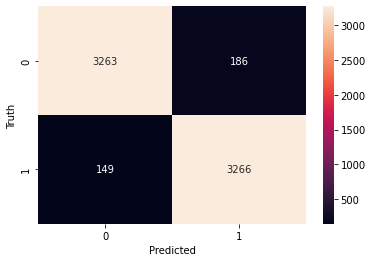

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3449
           1       0.95      0.96      0.95      3415

    accuracy                           0.95      6864
   macro avg       0.95      0.95      0.95      6864
weighted avg       0.95      0.95      0.95      6864

